In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
data=pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/kyphosis.csv")
data.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


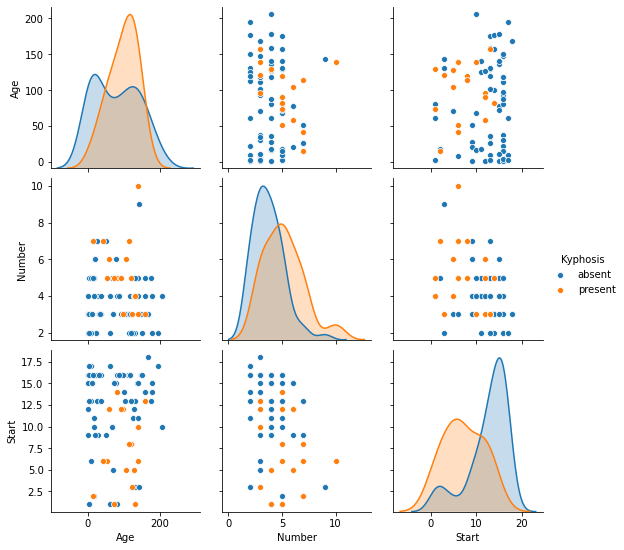

In [7]:
sns.pairplot(data,hue='Kyphosis')

In [8]:
X=data.drop('Kyphosis',axis=1)
y=data.Kyphosis

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [10]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
y_train_pred=dtree.predict(X_train)
y_train_pred

array(['present', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'absent', 'present', 'absent',
       'present', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'present', 'absent', 'present',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'present'], dtype=object)

In [12]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train,y_train_pred))


              precision    recall  f1-score   support

      absent       1.00      1.00      1.00        51
     present       1.00      1.00      1.00        13

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



In [13]:
confusion_matrix(y_train,y_train_pred)

array([[51,  0],
       [ 0, 13]])

In [14]:
y_test_pred=dtree.predict(X_test)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

      absent       0.73      0.85      0.79        13
     present       0.00      0.00      0.00         4

    accuracy                           0.65        17
   macro avg       0.37      0.42      0.39        17
weighted avg       0.56      0.65      0.60        17



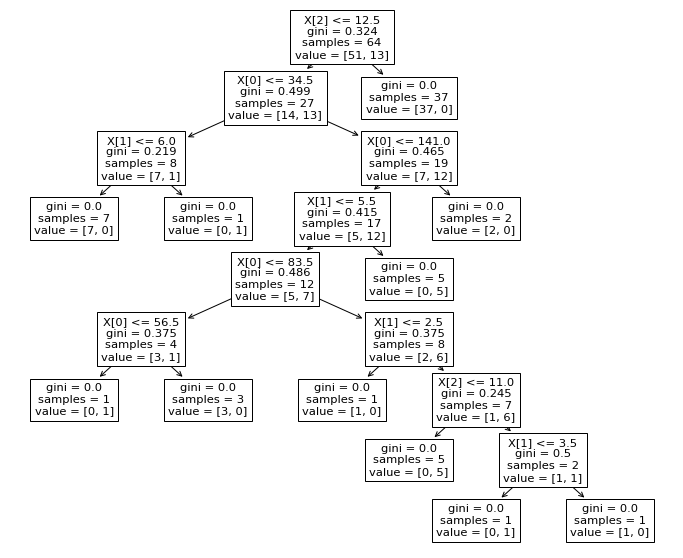

In [15]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(dtree)
plt.show()

In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(dtree,X_train,y_train,cv=5)

array([0.76923077, 0.92307692, 0.76923077, 0.92307692, 0.91666667])

In [17]:
grid_param={'criterion':['gini','entropy'],'max_depth':range(2,10,1),
            'min_samples_leaf':range(1,10,1)}

In [18]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=dtree,param_grid=grid_param)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [19]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 1}

In [20]:
clf=DecisionTreeClassifier(criterion='gini',max_depth= 8,min_samples_leaf= 1)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [21]:
pred_test=clf.predict(X_test)
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

      absent       0.79      0.85      0.81        13
     present       0.33      0.25      0.29         4

    accuracy                           0.71        17
   macro avg       0.56      0.55      0.55        17
weighted avg       0.68      0.71      0.69        17



In [22]:
from sklearn.model_selection import GridSearchCV
clf=DecisionTreeClassifier()
grid_search=GridSearchCV(estimator=clf,param_grid=grid_param)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [23]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1}

In [24]:
clf=DecisionTreeClassifier(criterion='gini',max_depth= 8,min_samples_leaf= 1)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [25]:
pred_test=clf.predict(X_test)
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

      absent       0.73      0.85      0.79        13
     present       0.00      0.00      0.00         4

    accuracy                           0.65        17
   macro avg       0.37      0.42      0.39        17
weighted avg       0.56      0.65      0.60        17



In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=40)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
y_pred_train=rfc.predict(X_train)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

      absent       1.00      1.00      1.00        51
     present       1.00      1.00      1.00        13

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



In [32]:
from sklearn.model_selection import cross_val_score
cross_val_score(rfc,X_train,y_train,cv=5)

array([0.92307692, 0.92307692, 0.84615385, 0.84615385, 0.83333333])